Overview
Description
No description added
Summary

Citation Request:
This dataset is public available for research. The details are described in [Cortez et al., 2009].
Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

    Title: Wine Quality

    Sources
    Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

    Past Usage:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).

    Relevant Information:

    The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
    For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
    Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
    are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

    These datasets can be viewed as classification or regression tasks.
    The classes are ordered and not balanced (e.g. there are munch more normal wines than
    excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
    or poor wines. Also, we are not sure if all input variables are relevant. So
    it could be interesting to test feature selection methods.

    Number of Instances: red wine - 1599; white wine - 4898.

    Number of Attributes: 11 + output attribute

    Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
    feature selection.

    Attribute information:

    For more information, read [Cortez et al., 2009].

    Input variables (based on physicochemical tests):
    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    Output variable (based on sensory data):
    12 - quality (score between 0 and 10)

    Missing Attribute Values: None

Source: UCI


Data Acquisition: Data is collected from Data.World Wine Quality Dataset
Data Prep: The red and white csv's should be combined and a column added for whether each observation is a red or white wine
Data Prep: Column data types are appropriate for the data they contain
Data Prep: Missing values are investigated and handled
Data Prep: Outliers are investigated and handled
Exploration: the interaction between independent variables and the target variable is explored using visualization and statistical testing
Exploration: Clustering is used to explore the data. A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. At least 3 combinations of features for clustering should be tried.
Modeling: At least 4 different models are created and their performance is compared. One model is the distinct combination of algorithm, hyperparameters, and features.
Best practices on data splitting are followed
The final notebook has a good title and the documentation within is sufficiently explanatory and of high quality
Decisions and judgment calls are made and explained/documented
All python code is of high quality

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import wrangle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, ttest_ind, chi2_contingency, f_oneway

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Visualizing
%matplotlib inline

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
import pandas as pd
df_red = pd.read_csv('https://query.data.world/s/qotfdduujswyksjibixmjkel5tg64q?dws=00000')

In [4]:
import pandas as pd
df_white = pd.read_csv('https://query.data.world/s/4chhaebvrfvrupasevbcqp5ubx62us?dws=00000')

In [5]:
# Add a 'type' column to each dataframe
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combine the red and white dataframes into a single dataframe
df = pd.concat([df_red, df_white], ignore_index=True)

In [6]:
df

fixed acidity     volatile acidity          citric acid  \
0                    7.40                 0.70                 0.00   
1                    7.80                 0.88                 0.00   
2                    7.80                 0.76                 0.04   
3                   11.20                 0.28                 0.56   
4                    7.40                 0.70                 0.00   
...                   ...                  ...                  ...   
6492                 6.20                 0.21                 0.29   
6493                 6.60                 0.32                 0.36   
6494                 6.50                 0.24                 0.19   
6495                 5.50                 0.29                 0.30   
6496                 6.00                 0.21                 0.38   

           residual sugar            chlorides  free sulfur dioxide  \
0                    1.90                 0.08                11.00   
1                    2.60                 0.10                25.00   
2                    2.30                 0.09                15.00   
3                    1.90                 0.07                17.00   
4                    1.90                 0.08                11.00   
...                   ...                  ...                  ...   
6492                 1.60                 0.04                24.00   
6493                 8.00                 0.05                57.00   
6494                 1.20                 0.04                30.00   
6495                 1.10                 0.02                20.00   
6496                 0.80                 0.02                22.00   

      total sulfur dioxide              density                   pH  \
0                    34.00                 1.00                 3.51   
1                    67.00                 1.00                 3.20   
2                    54.00                 1.00                 3.26   
3                    60.00                 1.00                 3.16   
4                    34.00                 1.00                 3.51   
...                    ...                  ...                  ...   
6492                 92.00                 0.99                 3.27   
6493                168.00                 0.99                 3.15   
6494                111.00                 0.99                 2.99   
6495                110.00                 0.99                 3.34   
6496                 98.00                 0.99                 3.26   

                sulphates              alcohol  quality   type  
0                    0.56                 9.40        5    red  
1                    0.68                 9.80        5    red  
2                    0.65                 9.80        5    red  
3                    0.58                 9.80        6    red  
4                    0.56                 9.40        5    red  
...                   ...                  ...      ...    ...  
6492                 0.50                11.20        6  white  
6493                 0.46                 9.60        5  white  
6494                 0.46                 9.40        6  white  
6495                 0.38                12.80        7  white  
6496                 0.32                11.80        6  white  

[6497 rows x 13 columns]

In [7]:
# Plot a heatmap of the correlation matrix
corr_matrix = df.corr()

In [8]:
corr_matrix

fixed acidity     volatile acidity  \
fixed acidity                        1.00                 0.22   
volatile acidity                     0.22                 1.00   
citric acid                          0.32                -0.38   
residual sugar                      -0.11                -0.20   
chlorides                            0.30                 0.38   
free sulfur dioxide                 -0.28                -0.35   
total sulfur dioxide                -0.33                -0.41   
density                              0.46                 0.27   
pH                                  -0.25                 0.26   
sulphates                            0.30                 0.23   
alcohol                             -0.10                -0.04   
quality                             -0.08                -0.27   

                              citric acid       residual sugar  \
fixed acidity                        0.32                -0.11   
volatile acidity                    -0.38                -0.20   
citric acid                          1.00                 0.14   
residual sugar                       0.14                 1.00   
chlorides                            0.04                -0.13   
free sulfur dioxide                  0.13                 0.40   
total sulfur dioxide                 0.20                 0.50   
density                              0.10                 0.55   
pH                                  -0.33                -0.27   
sulphates                            0.06                -0.19   
alcohol                             -0.01                -0.36   
quality                              0.09                -0.04   

                                chlorides  free sulfur dioxide  \
fixed acidity                        0.30                -0.28   
volatile acidity                     0.38                -0.35   
citric acid                          0.04                 0.13   
residual sugar                      -0.13                 0.40   
chlorides                            1.00                -0.20   
free sulfur dioxide                 -0.20                 1.00   
total sulfur dioxide                -0.28                 0.72   
density                              0.36                 0.03   
pH                                   0.04                -0.15   
sulphates                            0.40                -0.19   
alcohol                             -0.26                -0.18   
quality                             -0.20                 0.06   

                      total sulfur dioxide              density  \
fixed acidity                        -0.33                 0.46   
volatile acidity                     -0.41                 0.27   
citric acid                           0.20                 0.10   
residual sugar                        0.50                 0.55   
chlorides                            -0.28                 0.36   
free sulfur dioxide                   0.72                 0.03   
total sulfur dioxide                  1.00                 0.03   
density                               0.03                 1.00   
pH                                   -0.24                 0.01   
sulphates                            -0.28                 0.26   
alcohol                              -0.27                -0.69   
quality                              -0.04                -0.31   

                                       pH            sulphates  \
fixed acidity                       -0.25                 0.30   
volatile acidity                     0.26                 0.23   
citric acid                         -0.33                 0.06   
residual sugar                      -0.27                -0.19   
chlorides                            0.04                 0.40   
free sulfur dioxide                 -0.15                -0.19   
total sulfur dioxide                -0.24                -0.28   
density                              0.01          

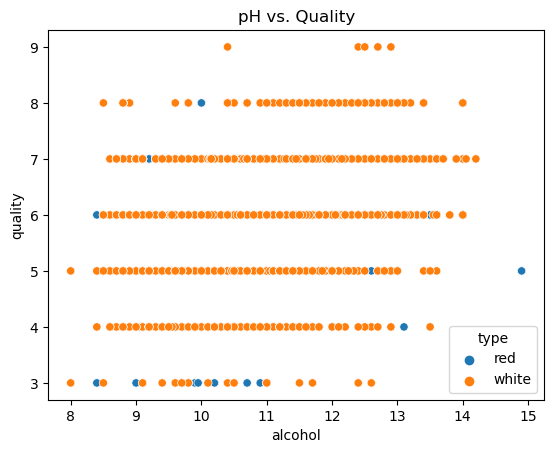

In [9]:
# Plot a scatter plot of alcohol content vs. wine quality
sns.scatterplot(x='alcohol', y='quality', hue='type',data=df)
plt.title('pH vs. Quality')
plt.show()

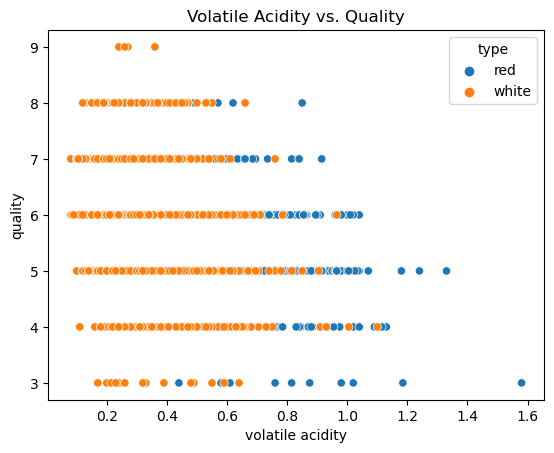

In [10]:
# Plot a scatter plot of volatile acidity vs. wine quality
sns.scatterplot(x='volatile acidity', y='quality', hue='type', data=df)
plt.title('Volatile Acidity vs. Quality')
plt.show()

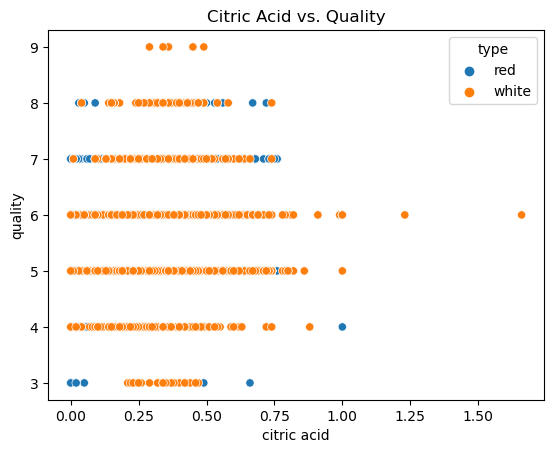

In [11]:
# Plot a scatter plot of citric acid vs. wine quality
sns.scatterplot(x='citric acid', y='quality', hue='type', data=df)
plt.title('Citric Acid vs. Quality')
plt.show()

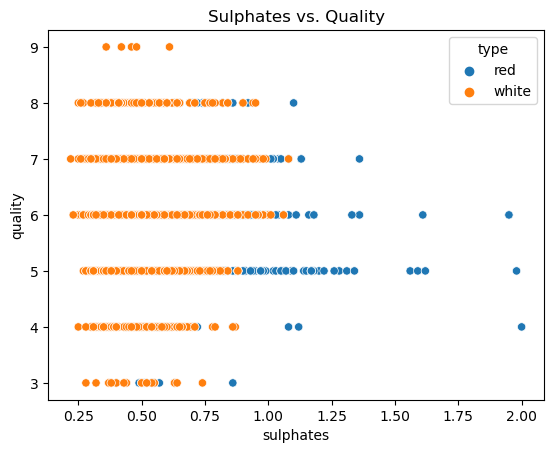

In [12]:
# Plot a scatter plot of sulphates vs. wine quality
sns.scatterplot(x='sulphates', y='quality', hue='type', data=df)
plt.title('Sulphates vs. Quality')
plt.show()

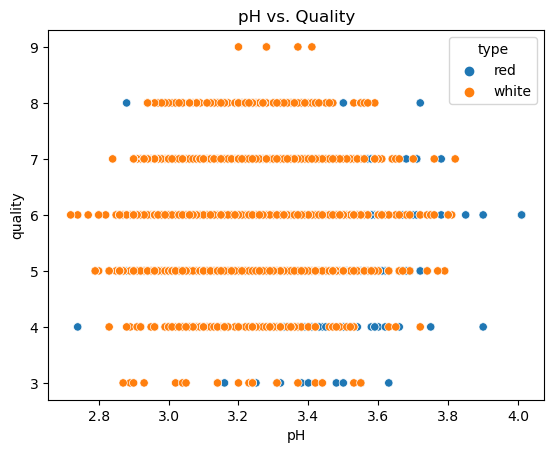

In [13]:
# Plot a scatter plot of pH vs. wine quality
sns.scatterplot(x='pH', y='quality', hue='type', data=df)
plt.title('pH vs. Quality')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor
#from data_preparation import preprocess_data

In [15]:
# Preprocess the data
preprocess_data = df

In [16]:
processed_data = preprocess_data

In [17]:
processed_data

fixed acidity     volatile acidity          citric acid  \
0                    7.40                 0.70                 0.00   
1                    7.80                 0.88                 0.00   
2                    7.80                 0.76                 0.04   
3                   11.20                 0.28                 0.56   
4                    7.40                 0.70                 0.00   
...                   ...                  ...                  ...   
6492                 6.20                 0.21                 0.29   
6493                 6.60                 0.32                 0.36   
6494                 6.50                 0.24                 0.19   
6495                 5.50                 0.29                 0.30   
6496                 6.00                 0.21                 0.38   

           residual sugar            chlorides  free sulfur dioxide  \
0                    1.90                 0.08                11.00   
1                    2.60                 0.10                25.00   
2                    2.30                 0.09                15.00   
3                    1.90                 0.07                17.00   
4                    1.90                 0.08                11.00   
...                   ...                  ...                  ...   
6492                 1.60                 0.04                24.00   
6493                 8.00                 0.05                57.00   
6494                 1.20                 0.04                30.00   
6495                 1.10                 0.02                20.00   
6496                 0.80                 0.02                22.00   

      total sulfur dioxide              density                   pH  \
0                    34.00                 1.00                 3.51   
1                    67.00                 1.00                 3.20   
2                    54.00                 1.00                 3.26   
3                    60.00                 1.00                 3.16   
4                    34.00                 1.00                 3.51   
...                    ...                  ...                  ...   
6492                 92.00                 0.99                 3.27   
6493                168.00                 0.99                 3.15   
6494                111.00                 0.99                 2.99   
6495                110.00                 0.99                 3.34   
6496                 98.00                 0.99                 3.26   

                sulphates              alcohol  quality   type  
0                    0.56                 9.40        5    red  
1                    0.68                 9.80        5    red  
2                    0.65                 9.80        5    red  
3                    0.58                 9.80        6    red  
4                    0.56                 9.40        5    red  
...                   ...                  ...      ...    ...  
6492                 0.50                11.20        6  white  
6493                 0.46                 9.60        5  white  
6494                 0.46                 9.40        6  white  
6495                 0.38                12.80        7  white  
6496                 0.32                11.80        6  white  

[6497 rows x 13 columns]

In [18]:
# Conduct one hot encoding on the 'type' column
encoded_data = pd.get_dummies(processed_data['type'], prefix='type')
processed_data = pd.concat([processed_data, encoded_data], axis=1)

# Drop the original 'type' column
processed_data.drop(['type'], axis=1, inplace=True)

# Train a random forest model
rf = RandomForestRegressor()
rf.fit(processed_data.drop('quality', axis=1), processed_data['quality'])

# Get feature importances
importances = rf.feature_importances_
features = processed_data.columns[:-1]

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
feature_importances.sort_values('importance', ascending=False, inplace=True)

In [19]:
processed_data

fixed acidity     volatile acidity          citric acid  \
0                    7.40                 0.70                 0.00   
1                    7.80                 0.88                 0.00   
2                    7.80                 0.76                 0.04   
3                   11.20                 0.28                 0.56   
4                    7.40                 0.70                 0.00   
...                   ...                  ...                  ...   
6492                 6.20                 0.21                 0.29   
6493                 6.60                 0.32                 0.36   
6494                 6.50                 0.24                 0.19   
6495                 5.50                 0.29                 0.30   
6496                 6.00                 0.21                 0.38   

           residual sugar            chlorides  free sulfur dioxide  \
0                    1.90                 0.08                11.00   
1                    2.60                 0.10                25.00   
2                    2.30                 0.09                15.00   
3                    1.90                 0.07                17.00   
4                    1.90                 0.08                11.00   
...                   ...                  ...                  ...   
6492                 1.60                 0.04                24.00   
6493                 8.00                 0.05                57.00   
6494                 1.20                 0.04                30.00   
6495                 1.10                 0.02                20.00   
6496                 0.80                 0.02                22.00   

      total sulfur dioxide              density                   pH  \
0                    34.00                 1.00                 3.51   
1                    67.00                 1.00                 3.20   
2                    54.00                 1.00                 3.26   
3                    60.00                 1.00                 3.16   
4                    34.00                 1.00                 3.51   
...                    ...                  ...                  ...   
6492                 92.00                 0.99                 3.27   
6493                168.00                 0.99                 3.15   
6494                111.00                 0.99                 2.99   
6495                110.00                 0.99                 3.34   
6496                 98.00                 0.99                 3.26   

                sulphates              alcohol  quality  type_red  type_white  
0                    0.56                 9.40        5         1           0  
1                    0.68                 9.80        5         1           0  
2                    0.65                 9.80        5         1           0  
3                    0.58                 9.80        6         1           0  
4                    0.56                 9.40        5         1           0  
...                   ...                  ...      ...       ...         ...  
6492                 0.50                11.20        6         0           1  
6493                 0.46                 9.60        5         0           1  
6494                 0.46                 9.40        6         0           1  
6495                 0.38                12.80        7         0           1  
6496                 0.32                11.80        6         0           1  

[6497 rows x 14 columns]

In [22]:
df = wrangle.drop_col_fraction(processed_data, 'type_white', frac=0.003)

In [23]:
df

fixed acidity     volatile acidity          citric acid  \
0                    7.40                 0.70                 0.00   
1                    7.80                 0.88                 0.00   
2                    7.80                 0.76                 0.04   
3                   11.20                 0.28                 0.56   
4                    7.40                 0.70                 0.00   
...                   ...                  ...                  ...   
6492                 6.20                 0.21                 0.29   
6493                 6.60                 0.32                 0.36   
6494                 6.50                 0.24                 0.19   
6495                 5.50                 0.29                 0.30   
6496                 6.00                 0.21                 0.38   

           residual sugar            chlorides  free sulfur dioxide  \
0                    1.90                 0.08                11.00   
1                    2.60                 0.10                25.00   
2                    2.30                 0.09                15.00   
3                    1.90                 0.07                17.00   
4                    1.90                 0.08                11.00   
...                   ...                  ...                  ...   
6492                 1.60                 0.04                24.00   
6493                 8.00                 0.05                57.00   
6494                 1.20                 0.04                30.00   
6495                 1.10                 0.02                20.00   
6496                 0.80                 0.02                22.00   

      total sulfur dioxide              density                   pH  \
0                    34.00                 1.00                 3.51   
1                    67.00                 1.00                 3.20   
2                    54.00                 1.00                 3.26   
3                    60.00                 1.00                 3.16   
4                    34.00                 1.00                 3.51   
...                    ...                  ...                  ...   
6492                 92.00                 0.99                 3.27   
6493                168.00                 0.99                 3.15   
6494                111.00                 0.99                 2.99   
6495                110.00                 0.99                 3.34   
6496                 98.00                 0.99                 3.26   

                sulphates              alcohol  quality  type_red  \
0                    0.56                 9.40        5         1   
1                    0.68                 9.80        5         1   
2                    0.65                 9.80        5         1   
3                    0.58                 9.80        6         1   
4                    0.56                 9.40        5         1   
...                   ...                  ...      ...       ...   
6492                 0.50                11.20        6         0   
6493                 0.46                 9.60        5         0   
6494                 0.46                 9.40        6         0   
6495                 0.38                12.80        7         0   
6496                 0.32                11.80        6         0   

               type_white  
0                    0.00  
1                    0.00  
2                    0.00  
3                    0.00  
4                    0.00  
...                   ...  
6492                 1.00  
6493                 1.00  
6494                 1.00  
6495                 1.00  
6496                 1.00  

[6497 rows x 14 columns]

In [24]:
df = wrangle.remove_outliers_iqr_loop(df)

In [25]:
df

fixed acidity     volatile acidity          citric acid  \
1600                 6.30                 0.30                 0.34   
1601                 8.10                 0.28                 0.40   
1602                 7.20                 0.23                 0.32   
1603                 7.20                 0.23                 0.32   
1604                 8.10                 0.28                 0.40   
...                   ...                  ...                  ...   
6492                 6.20                 0.21                 0.29   
6493                 6.60                 0.32                 0.36   
6494                 6.50                 0.24                 0.19   
6495                 5.50                 0.29                 0.30   
6496                 6.00                 0.21                 0.38   

           residual sugar            chlorides  free sulfur dioxide  \
1600                 1.60                 0.05                14.00   
1601                 6.90                 0.05                30.00   
1602                 8.50                 0.06                47.00   
1603                 8.50                 0.06                47.00   
1604                 6.90                 0.05                30.00   
...                   ...                  ...                  ...   
6492                 1.60                 0.04                24.00   
6493                 8.00                 0.05                57.00   
6494                 1.20                 0.04                30.00   
6495                 1.10                 0.02                20.00   
6496                 0.80                 0.02                22.00   

      total sulfur dioxide              density                   pH  \
1600                132.00                 0.99                 3.30   
1601                 97.00                 1.00                 3.26   
1602                186.00                 1.00                 3.19   
1603                186.00                 1.00                 3.19   
1604                 97.00                 1.00                 3.26   
...                    ...                  ...                  ...   
6492                 92.00                 0.99                 3.27   
6493                168.00                 0.99                 3.15   
6494                111.00                 0.99                 2.99   
6495                110.00                 0.99                 3.34   
6496                 98.00                 0.99                 3.26   

                sulphates              alcohol  quality  type_red  \
1600                 0.49                 9.50        6         0   
1601                 0.44                10.10        6         0   
1602                 0.40                 9.90        6         0   
1603                 0.40                 9.90        6         0   
1604                 0.44                10.10        6         0   
...                   ...                  ...      ...       ...   
6492                 0.50                11.20        6         0   
6493                 0.46                 9.60        5         0   
6494                 0.46                 9.40        6         0   
6495                 0.38                12.80        7         0   
6496                 0.32                11.80        6         0   

               type_white  
1600                 1.00  
1601                 1.00  
1602                 1.00  
1603                 1.00  
1604                 1.00  
...                   ...  
6492                 1.00  
6493                 1.00  
6494                 1.00  
6495                 1.00  
6496                 1.00  

[3647 rows x 14 columns]

In [26]:
feature_importances

feature           importance
10               alcohol                 0.25
1       volatile acidity                 0.13
5    free sulfur dioxide                 0.09
9              sulphates                 0.08
6   total sulfur dioxide                 0.07
3         residual sugar                 0.07
8                     pH                 0.07
4              chlorides                 0.07
2            citric acid                 0.06
7                density                 0.06
0          fixed acidity                 0.06
12              type_red                 0.00
11               quality                 0.00

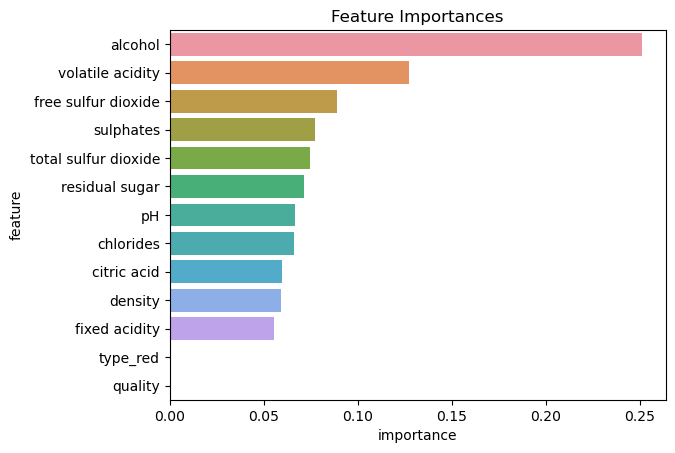

In [27]:
# Plot a bar chart of the feature importances
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [ ]:
processed_data = wrangle.

In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(processed_data):
    # Convert categorical variables to dummy variables
    processed_data = pd.get_dummies(processed_data, drop_first=True)

    # Fill missing values with the mean of the column
    data.fillna(data.mean(), inplace=True)

    # Identify and handle outliers
    # First, we can calculate the z-score for each value
    z_scores = (data - data.mean()) / data.std()
    # Then, we can identify values with a z-score greater than 3
    outlier_mask = (z_scores.abs() > 3).any(axis=1)
    # Finally, we can replace outliers with the mean of the column
    data[outlier_mask] = data.mean()

    # Scale the data using StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.drop('quality', axis=1))

    # Create a DataFrame with the scaled data and the quality column
    processed_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])
    processed_data['quality'] = data['quality']

    return processed_data

In [29]:
df

fixed acidity     volatile acidity          citric acid  \
1600                 6.30                 0.30                 0.34   
1601                 8.10                 0.28                 0.40   
1602                 7.20                 0.23                 0.32   
1603                 7.20                 0.23                 0.32   
1604                 8.10                 0.28                 0.40   
...                   ...                  ...                  ...   
6492                 6.20                 0.21                 0.29   
6493                 6.60                 0.32                 0.36   
6494                 6.50                 0.24                 0.19   
6495                 5.50                 0.29                 0.30   
6496                 6.00                 0.21                 0.38   

           residual sugar            chlorides  free sulfur dioxide  \
1600                 1.60                 0.05                14.00   
1601                 6.90                 0.05                30.00   
1602                 8.50                 0.06                47.00   
1603                 8.50                 0.06                47.00   
1604                 6.90                 0.05                30.00   
...                   ...                  ...                  ...   
6492                 1.60                 0.04                24.00   
6493                 8.00                 0.05                57.00   
6494                 1.20                 0.04                30.00   
6495                 1.10                 0.02                20.00   
6496                 0.80                 0.02                22.00   

      total sulfur dioxide              density                   pH  \
1600                132.00                 0.99                 3.30   
1601                 97.00                 1.00                 3.26   
1602                186.00                 1.00                 3.19   
1603                186.00                 1.00                 3.19   
1604                 97.00                 1.00                 3.26   
...                    ...                  ...                  ...   
6492                 92.00                 0.99                 3.27   
6493                168.00                 0.99                 3.15   
6494                111.00                 0.99                 2.99   
6495                110.00                 0.99                 3.34   
6496                 98.00                 0.99                 3.26   

                sulphates              alcohol  quality  type_red  \
1600                 0.49                 9.50        6         0   
1601                 0.44                10.10        6         0   
1602                 0.40                 9.90        6         0   
1603                 0.40                 9.90        6         0   
1604                 0.44                10.10        6         0   
...                   ...                  ...      ...       ...   
6492                 0.50                11.20        6         0   
6493                 0.46                 9.60        5         0   
6494                 0.46                 9.40        6         0   
6495                 0.38                12.80        7         0   
6496                 0.32                11.80        6         0   

               type_white  
1600                 1.00  
1601                 1.00  
1602                 1.00  
1603                 1.00  
1604                 1.00  
...                   ...  
6492                 1.00  
6493                 1.00  
6494                 1.00  
6495                 1.00  
6496                 1.00  

[3647 rows x 14 columns]

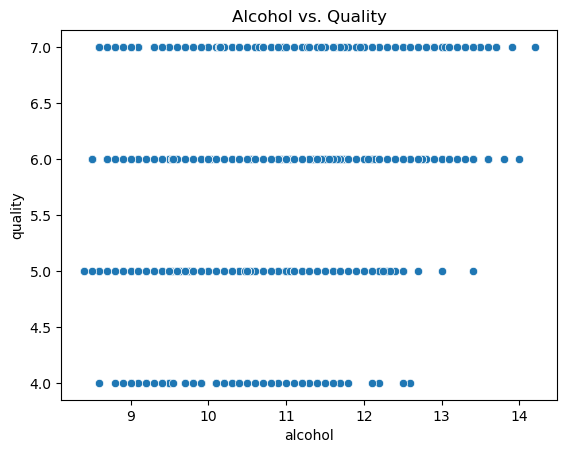

In [36]:
# Plot a scatter plot of alcohol content vs. wine quality
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Alcohol vs. Quality')
plt.show()

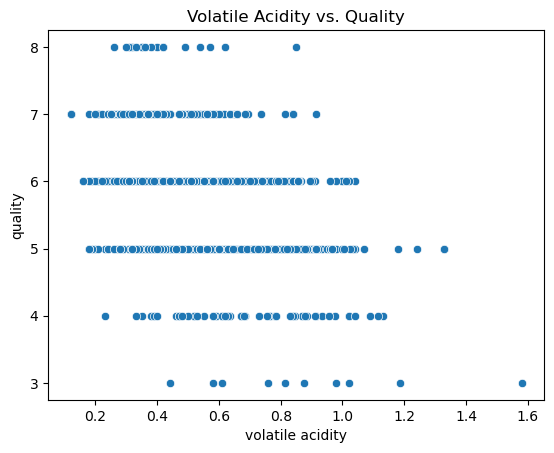

In [37]:
# Plot a scatter plot of volatile acidity vs. wine quality
sns.scatterplot(x='volatile acidity', y='quality', data=df_red)
plt.title('Volatile Acidity vs. Quality')
plt.show()

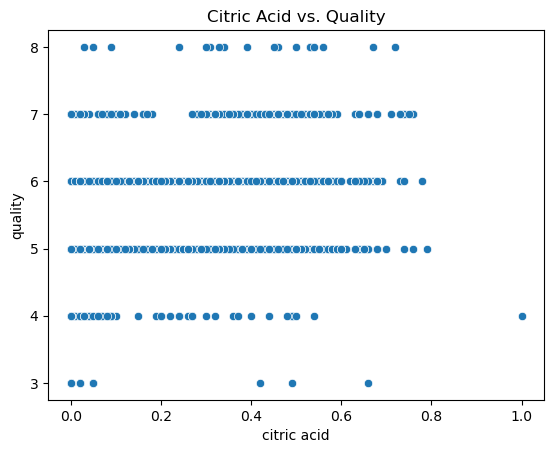

In [38]:
# Plot a scatter plot of citric acid vs. wine quality
sns.scatterplot(x='citric acid', y='quality', data=df_red)
plt.title('Citric Acid vs. Quality')
plt.show()

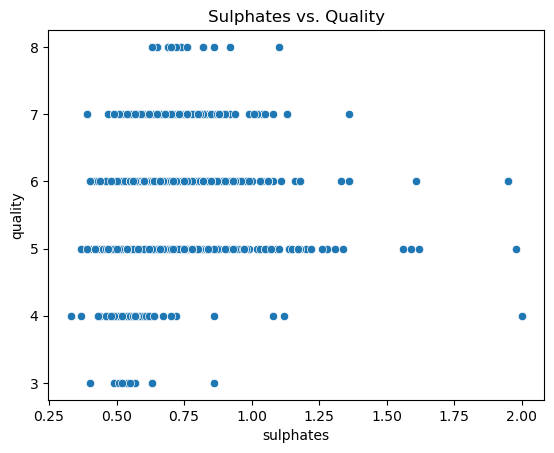

In [39]:
# Plot a scatter plot of sulphates vs. wine quality
sns.scatterplot(x='sulphates', y='quality', data=df_red)
plt.title('Sulphates vs. Quality')
plt.show()

In [40]:
# Print the dataframe with the 'type' column added
df.head()

fixed acidity     volatile acidity          citric acid  \
1600                 6.30                 0.30                 0.34   
1601                 8.10                 0.28                 0.40   
1602                 7.20                 0.23                 0.32   
1603                 7.20                 0.23                 0.32   
1604                 8.10                 0.28                 0.40   

           residual sugar            chlorides  free sulfur dioxide  \
1600                 1.60                 0.05                14.00   
1601                 6.90                 0.05                30.00   
1602                 8.50                 0.06                47.00   
1603                 8.50                 0.06                47.00   
1604                 6.90                 0.05                30.00   

      total sulfur dioxide              density                   pH  \
1600                132.00                 0.99                 3.30   
1601                 97.00                 1.00                 3.26   
1602                186.00                 1.00                 3.19   
1603                186.00                 1.00                 3.19   
1604                 97.00                 1.00                 3.26   

                sulphates              alcohol  quality  type_red  \
1600                 0.49                 9.50        6         0   
1601                 0.44                10.10        6         0   
1602                 0.40                 9.90        6         0   
1603                 0.40                 9.90        6         0   
1604                 0.44                10.10        6         0   

               type_white  
1600                 1.00  
1601                 1.00  
1602                 1.00  
1603                 1.00  
1604                 1.00

In [41]:
df

fixed acidity     volatile acidity          citric acid  \
1600                 6.30                 0.30                 0.34   
1601                 8.10                 0.28                 0.40   
1602                 7.20                 0.23                 0.32   
1603                 7.20                 0.23                 0.32   
1604                 8.10                 0.28                 0.40   
...                   ...                  ...                  ...   
6492                 6.20                 0.21                 0.29   
6493                 6.60                 0.32                 0.36   
6494                 6.50                 0.24                 0.19   
6495                 5.50                 0.29                 0.30   
6496                 6.00                 0.21                 0.38   

           residual sugar            chlorides  free sulfur dioxide  \
1600                 1.60                 0.05                14.00   
1601                 6.90                 0.05                30.00   
1602                 8.50                 0.06                47.00   
1603                 8.50                 0.06                47.00   
1604                 6.90                 0.05                30.00   
...                   ...                  ...                  ...   
6492                 1.60                 0.04                24.00   
6493                 8.00                 0.05                57.00   
6494                 1.20                 0.04                30.00   
6495                 1.10                 0.02                20.00   
6496                 0.80                 0.02                22.00   

      total sulfur dioxide              density                   pH  \
1600                132.00                 0.99                 3.30   
1601                 97.00                 1.00                 3.26   
1602                186.00                 1.00                 3.19   
1603                186.00                 1.00                 3.19   
1604                 97.00                 1.00                 3.26   
...                    ...                  ...                  ...   
6492                 92.00                 0.99                 3.27   
6493                168.00                 0.99                 3.15   
6494                111.00                 0.99                 2.99   
6495                110.00                 0.99                 3.34   
6496                 98.00                 0.99                 3.26   

                sulphates              alcohol  quality  type_red  \
1600                 0.49                 9.50        6         0   
1601                 0.44                10.10        6         0   
1602                 0.40                 9.90        6         0   
1603                 0.40                 9.90        6         0   
1604                 0.44                10.10        6         0   
...                   ...                  ...      ...       ...   
6492                 0.50                11.20        6         0   
6493                 0.46                 9.60        5         0   
6494                 0.46                 9.40        6         0   
6495                 0.38                12.80        7         0   
6496                 0.32                11.80        6         0   

               type_white  
1600                 1.00  
1601                 1.00  
1602                 1.00  
1603                 1.00  
1604                 1.00  
...                   ...  
6492                 1.00  
6493                 1.00  
6494                 1.00  
6495                 1.00  
6496                 1.00  

[3647 rows x 14 columns]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3647 entries, 1600 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3647 non-null   float64
 1   volatile acidity      3647 non-null   float64
 2   citric acid           3647 non-null   float64
 3   residual sugar        3647 non-null   float64
 4   chlorides             3647 non-null   float64
 5   free sulfur dioxide   3647 non-null   float64
 6   total sulfur dioxide  3647 non-null   float64
 7   density               3647 non-null   float64
 8   pH                    3647 non-null   float64
 9   sulphates             3647 non-null   float64
 10  alcohol               3647 non-null   float64
 11  quality               3647 non-null   int64  
 12  type_red              3647 non-null   uint8  
 13  type_white            3647 non-null   float64
dtypes: float64(12), int64(1), uint8(1)
memory usage: 402.5 KB


In [48]:
# Perform a chi-squared test to compare the distribution of wine quality ratings between red and white wines
quality_counts = pd.crosstab(df['quality'], df['pH'])
chi2_stat, p_value, dof, expected = chi2_contingency(quality_counts)
print('Chi-squared statistic:', chi2_stat)
print('p-value:', p_value)

Chi-squared statistic: 367.35305314431946
p-value: 1.0842082797362918e-10


In [49]:
quality_counts

pH       2.84  2.85  2.86  2.87  2.88  2.89  2.90  2.91  2.92  2.93  ...  \
quality                                                              ...   
4           0     0     0     0     1     0     0     2     0     0  ...   
5           0     2     1     3     0     4     2     0     3     3  ...   
6           0     0     5     2    10     8     5     6     5    10  ...   
7           1     0     0     0     0     0    16     2     4     5  ...   

pH       3.45  3.46  3.47  3.48  3.49  3.50  3.51  3.52  3.53  3.54  
quality                                                              
4           0     1     1     0     1     0     0     1     0     0  
5           4     5     3     2     1     7     0     3     2     1  
6           4    10    11    10    11     6     4     8     2     5  
7           7     8     2     4     5     1     5     3     2     6  

[4 rows x 71 columns]

> investigate the each quality

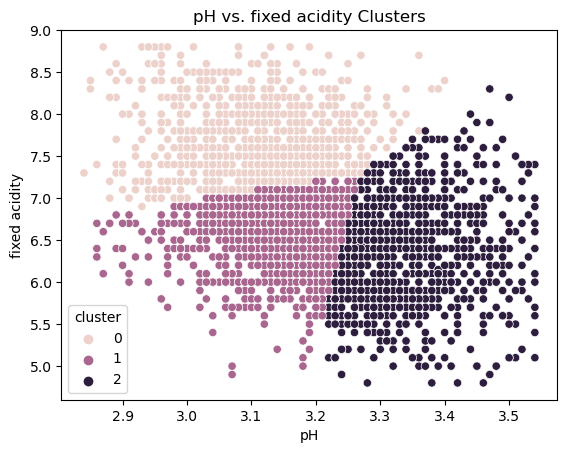

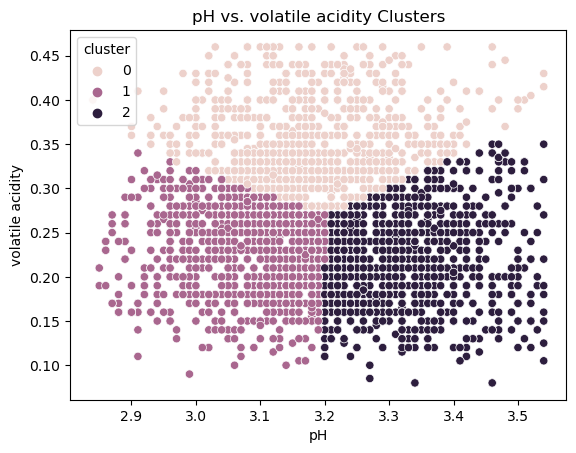

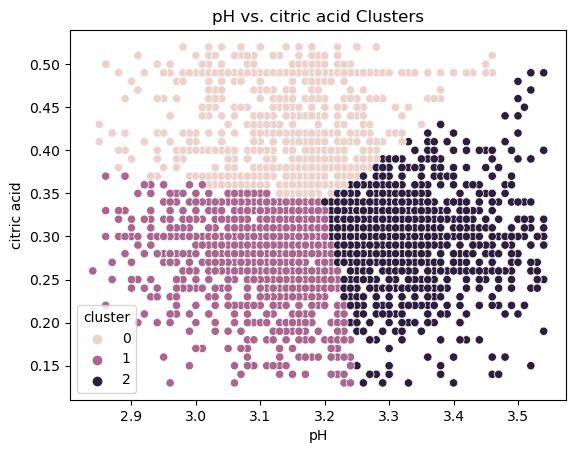

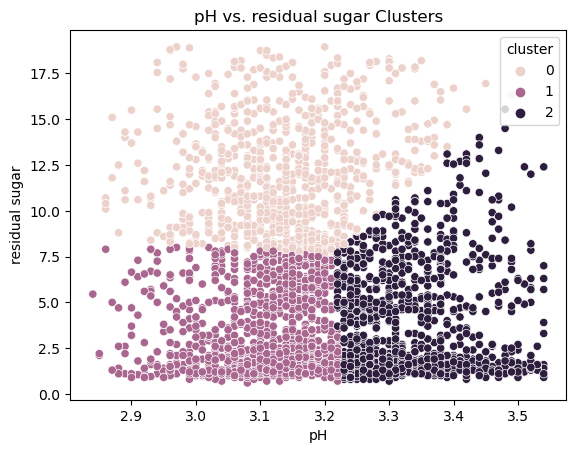

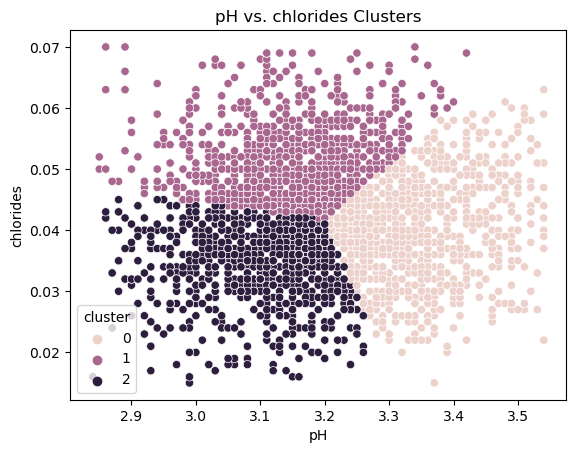

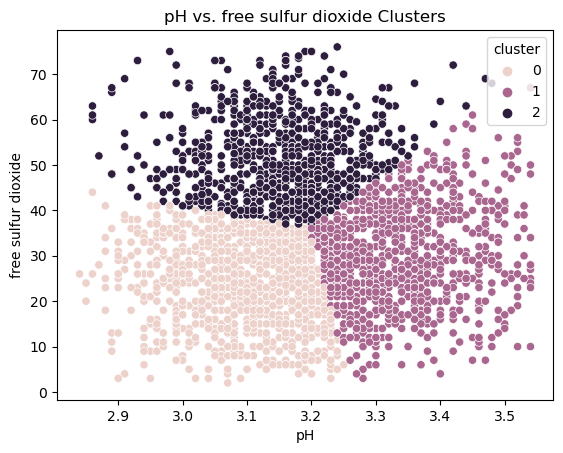

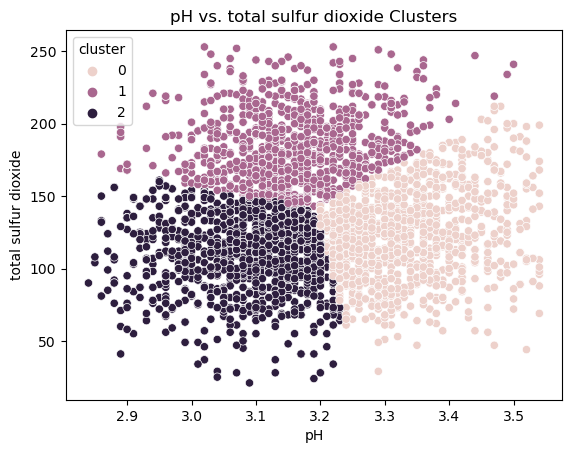

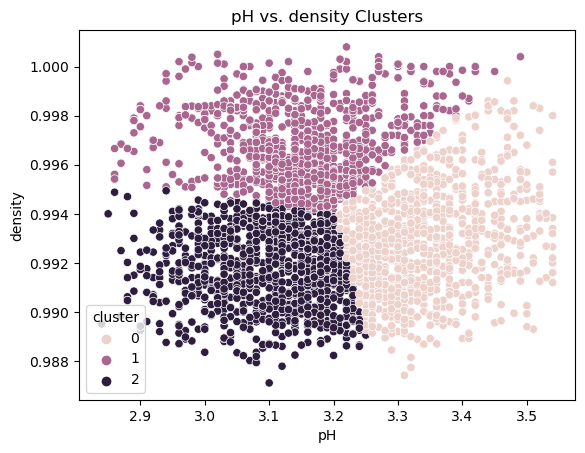

ValueError: Data must be 1-dimensional

In [50]:
# Define the features and target variable
features = df.drop(['quality'], axis=1).columns

# Create a DataFrame with the alcohol column
alcohol_data = df[['pH']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(alcohol_data)

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the DataFrame
alcohol_data['cluster'] = kmeans.labels_

# Loop through each feature (excluding 'quality') and create a scatter plot of alcohol vs. the feature
for feature in features:
    if feature != 'quality':
        # Create a DataFrame with the alcohol and feature columns
        clustering_data = df[['pH', feature]]

        # Scale the data
        scaled_data = scaler.fit_transform(clustering_data)

        # Create a KMeans model with 3 clusters
        kmeans = KMeans(n_clusters=3, random_state=42)
        kmeans.fit(scaled_data)

        # Add the cluster labels to the DataFrame
        clustering_data['cluster'] = kmeans.labels_

        # Create a scatter plot of alcohol vs. the feature
        sns.scatterplot(x='pH', y=feature, hue='cluster', data=clustering_data)
        plt.title('pH vs. ' + feature + ' Clusters')
        plt.show()


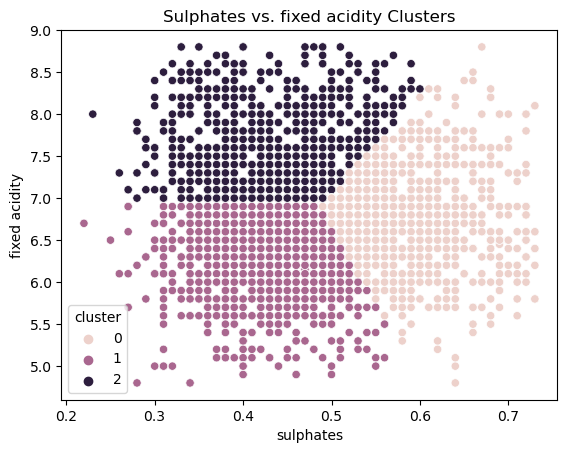

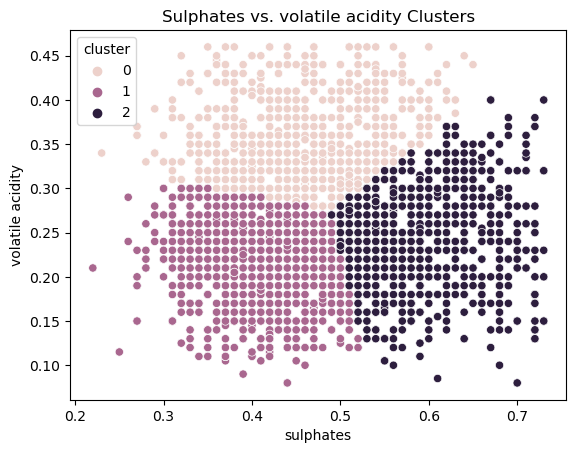

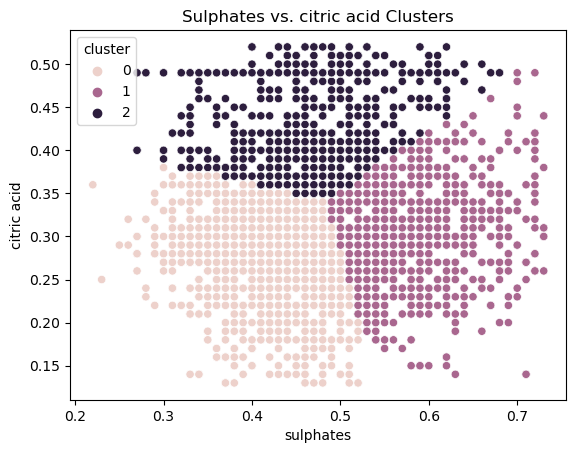

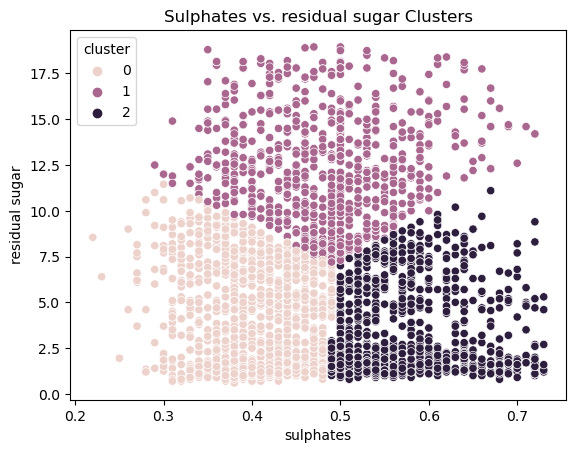

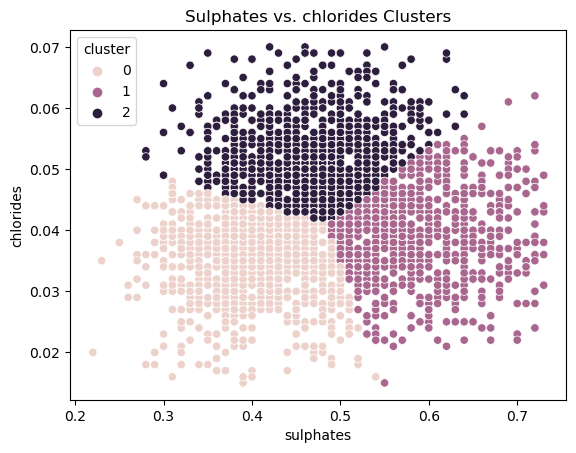

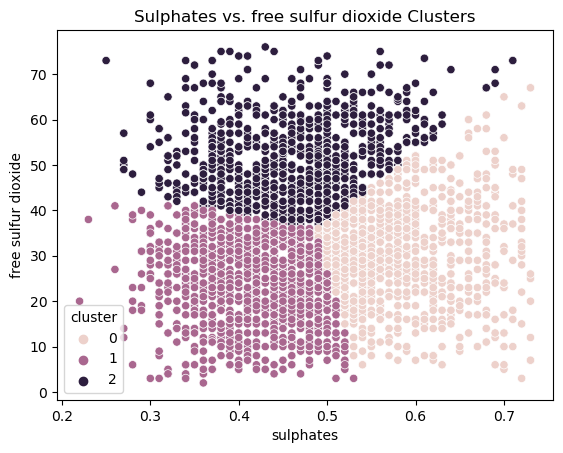

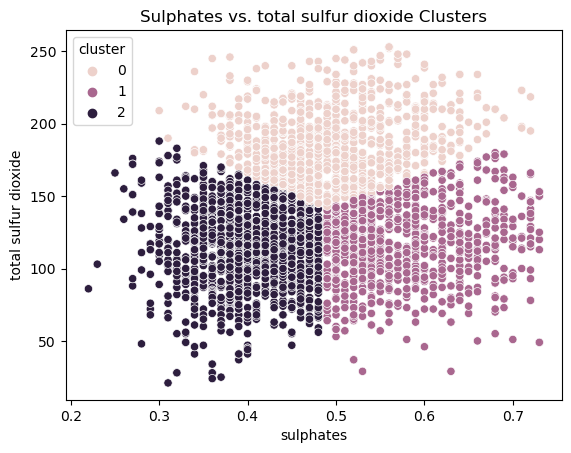

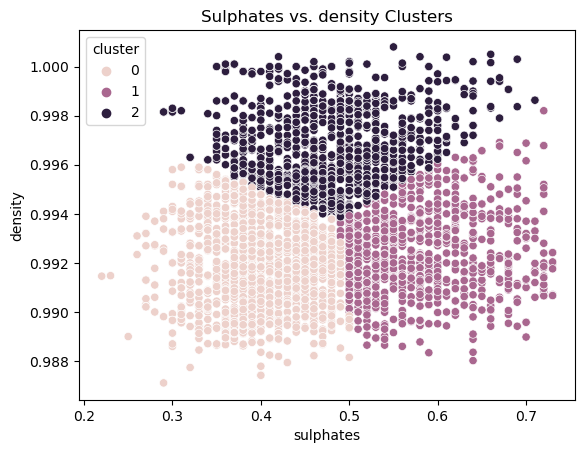

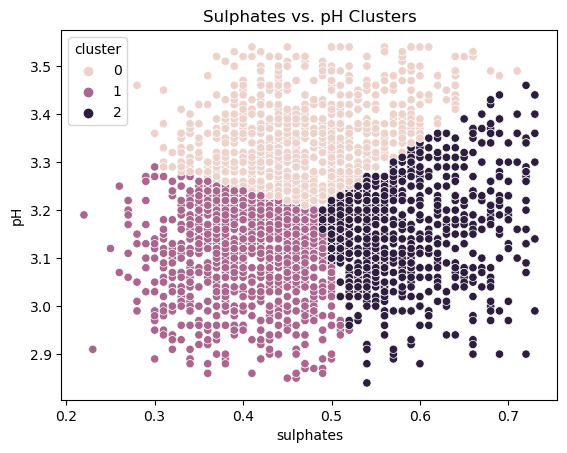

ValueError: Data must be 1-dimensional

In [51]:
# Define the features and target variable
features = df.drop(['quality'], axis=1).columns

# Create a DataFrame with the alcohol column
alcohol_data = df[['sulphates']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(alcohol_data)

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the DataFrame
alcohol_data['cluster'] = kmeans.labels_

# Loop through each feature (excluding 'quality') and create a scatter plot of alcohol vs. the feature
for feature in features:
    if feature != 'quality':
        # Create a DataFrame with the alcohol and feature columns
        clustering_data = df[['sulphates', feature]]

        # Scale the data
        scaled_data = scaler.fit_transform(clustering_data)

        # Create a KMeans model with 3 clusters
        kmeans = KMeans(n_clusters=3, random_state=42)
        kmeans.fit(scaled_data)

        # Add the cluster labels to the DataFrame
        clustering_data['cluster'] = kmeans.labels_

        # Create a scatter plot of alcohol vs. the feature
        sns.scatterplot(x='sulphates', y=feature, hue='cluster', data=clustering_data)
        plt.title('Sulphates vs. ' + feature + ' Clusters')
        plt.show()


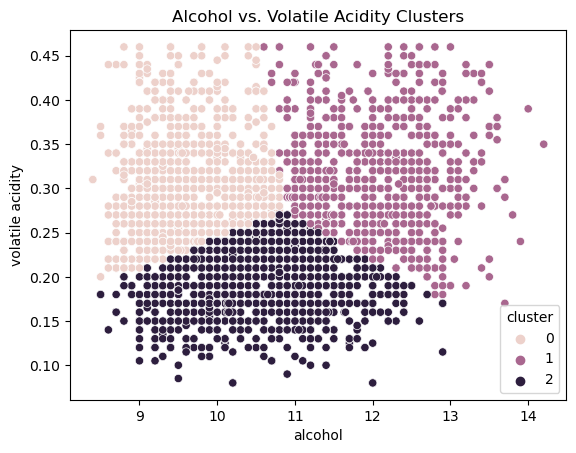

In [52]:
from sklearn.cluster import KMeans

# Create a DataFrame with the alcohol and volatile acidity columns
clustering_data = df[['alcohol', 'volatile acidity']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the DataFrame
clustering_data['cluster'] = kmeans.labels_

# Plot the clusters
sns.scatterplot(x='alcohol', y='volatile acidity', hue='cluster', data=clustering_data)
plt.title('Alcohol vs. Volatile Acidity Clusters')
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Preprocess the data
df = processed_data
preprocess_data = processed_data

In [55]:
# Split the data into training and testing sets
train_data = processed_data.sample(frac=0.8, random_state=42)
test_data = processed_data.drop(train_data.index)

# Define the features and target variable
features = processed_data.columns[:-1]
target = 'quality'

# Create the models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
svm_model = SVR()

# Train the models
linear_model.fit(train_data[features], train_data[target])
tree_model.fit(train_data[features], train_data[target])
forest_model.fit(train_data[features], train_data[target])
svm_model.fit(train_data[features], train_data[target])

# Make predictions on the test data
linear_pred = linear_model.predict(test_data[features])
tree_pred = tree_model.predict(test_data[features])
forest_pred = forest_model.predict(test_data[features])
svm_pred = svm_model.predict(test_data[features])

# Evaluate the models
linear_rmse = mean_squared_error(test_data[target], linear_pred, squared=False)
tree_rmse = mean_squared_error(test_data[target], tree_pred, squared=False)
forest_rmse = mean_squared_error(test_data[target], forest_pred, squared=False)
svm_rmse = mean_squared_error(test_data[target], svm_pred, squared=False)

linear_r2 = r2_score(test_data[target], linear_pred)
tree_r2 = r2_score(test_data[target], tree_pred)
forest_r2 = r2_score(test_data[target], forest_pred)
svm_r2 = r2_score(test_data[target], svm_pred)

print('Linear Regression RMSE:', linear_rmse)
print('Decision Tree RMSE:', tree_rmse)
print('Random Forest RMSE:', forest_rmse)
print('Support Vector Regression RMSE:', svm_rmse)

print('Linear Regression R2:', linear_r2)
print('Decision Tree R2:', tree_r2)
print('Random Forest R2:', forest_r2)
print('Support Vector Regression R2:', svm_r2)

Linear Regression RMSE: 3.2657941735897133e-15
Decision Tree RMSE: 0.0
Random Forest RMSE: 0.0003923832159314668
Support Vector Regression RMSE: 0.5512699972881588
Linear Regression R2: 1.0
Decision Tree R2: 1.0
Random Forest R2: 0.9999997973539005
Support Vector Regression R2: 0.6000127778888846


In [56]:
important_features = feature_importances[feature_importances['importance'] > 0.05]['feature'].tolist()
distinct_model = RandomForestRegressor(n_estimators=100, max_depth=5)

In [57]:
important_features

['alcohol',
 'volatile acidity',
 'free sulfur dioxide',
 'sulphates',
 'total sulfur dioxide',
 'residual sugar',
 'pH',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity']

In [58]:
distinct_model

RandomForestRegressor(max_depth=5)

> Repeat the process

Cluster 1 Mean Quality: 5.755822159491884
Cluster 2 Mean Quality: 6.075736325385694
Cluster 3 Mean Quality: 5.8162711864406775
ANOVA p-value: 1.9838412230814348e-17


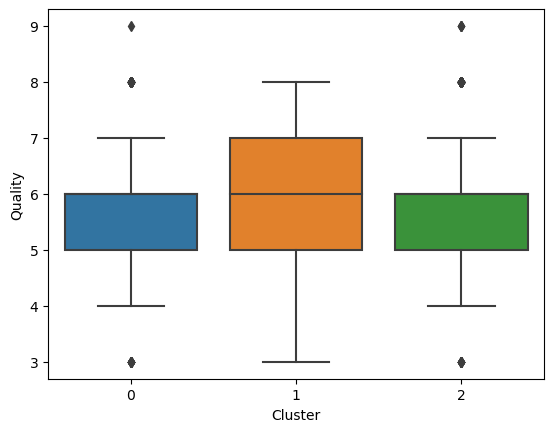

In [59]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Define the features and target variable
X = df[['sulphates']]
y = df['quality']

# Fit a KMeans model to the data
model = KMeans(n_clusters=3)
clustering_data = df.copy()
clustering_data['cluster'] = model.fit_predict(X)

# Print the mean quality for each cluster
for i in range(3):
    cluster_quality = df.loc[clustering_data['cluster'] == i, 'quality']
    print('Cluster', i+1, 'Mean Quality:', cluster_quality.mean())

# Perform ANOVA on the quality values for each cluster
f_stat, p_value = f_oneway(df.loc[clustering_data['cluster'] == 0, 'quality'],
                           df.loc[clustering_data['cluster'] == 1, 'quality'],
                           df.loc[clustering_data['cluster'] == 2, 'quality'])
print('ANOVA p-value:', p_value)

# Create boxplots of wine quality for each cluster
sns.boxplot(x=clustering_data['cluster'], y=df['quality'])
plt.xlabel('Cluster')
plt.ylabel('Quality')
plt.show()


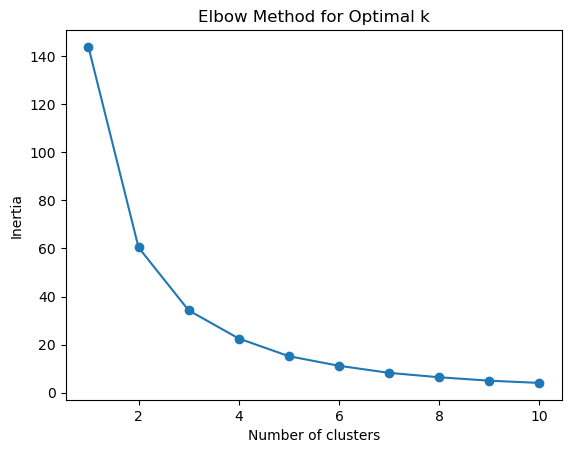

In [60]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

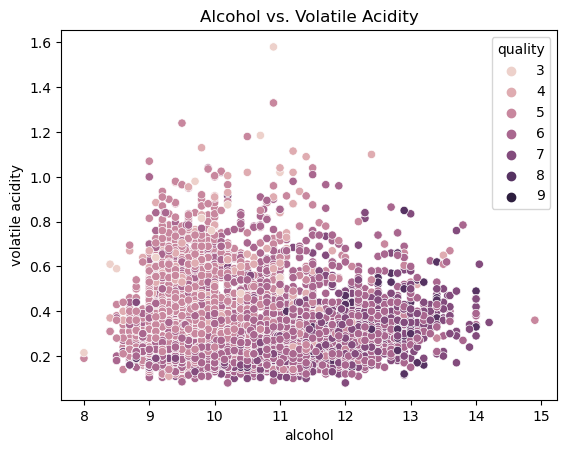

In [61]:
# Combination 1: Alcohol and volatile acidity
sns.scatterplot(x='alcohol', y='volatile acidity', hue='quality', data=df)
plt.title('Alcohol vs. Volatile Acidity')
plt.show()

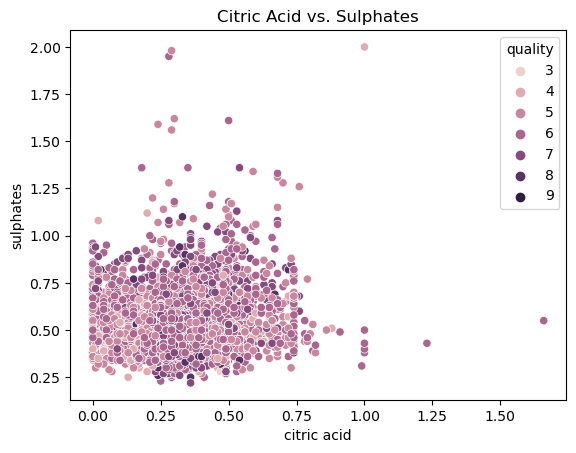

In [62]:
# Combination 2: Citric acid and sulphates
sns.scatterplot(x='citric acid', y='sulphates', hue='quality', data=df)
plt.title('Citric Acid vs. Sulphates')
plt.show()

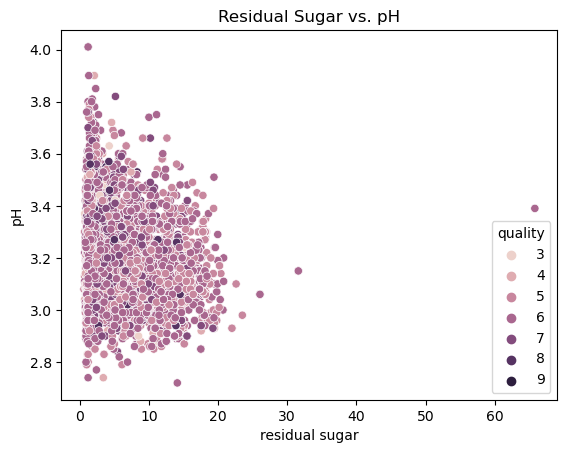

In [63]:
# Combination 3: Residual sugar and pH
sns.scatterplot(x='residual sugar', y='pH', hue='quality', data=df)
plt.title('Residual Sugar vs. pH')
plt.show()

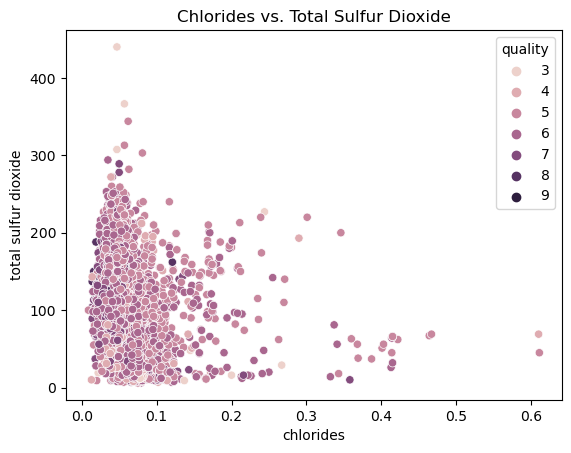

In [64]:
# Combination 4: Chlorides and total sulfur dioxide
sns.scatterplot(x='chlorides', y='total sulfur dioxide', hue='quality', data=df)
plt.title('Chlorides vs. Total Sulfur Dioxide')
plt.show()

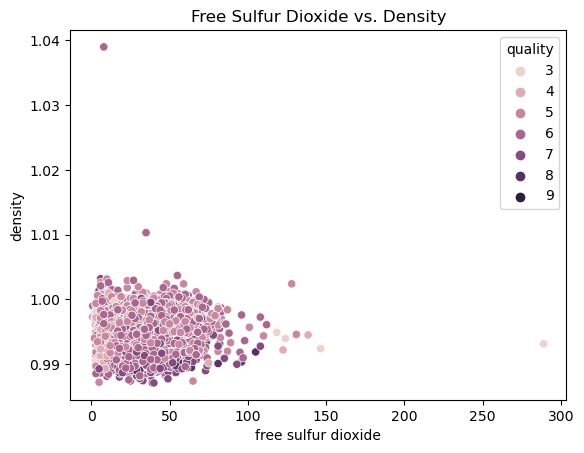

In [65]:
# Combination 5: Free sulfur dioxide and density
sns.scatterplot(x='free sulfur dioxide', y='density', hue='quality', data=df)
plt.title('Free Sulfur Dioxide vs. Density')
plt.show()

In [66]:
# assign the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

In [67]:
df

fixed acidity     volatile acidity          citric acid  \
0                    7.40                 0.70                 0.00   
1                    7.80                 0.88                 0.00   
2                    7.80                 0.76                 0.04   
3                   11.20                 0.28                 0.56   
4                    7.40                 0.70                 0.00   
...                   ...                  ...                  ...   
6492                 6.20                 0.21                 0.29   
6493                 6.60                 0.32                 0.36   
6494                 6.50                 0.24                 0.19   
6495                 5.50                 0.29                 0.30   
6496                 6.00                 0.21                 0.38   

           residual sugar            chlorides  free sulfur dioxide  \
0                    1.90                 0.08                11.00   
1                    2.60                 0.10                25.00   
2                    2.30                 0.09                15.00   
3                    1.90                 0.07                17.00   
4                    1.90                 0.08                11.00   
...                   ...                  ...                  ...   
6492                 1.60                 0.04                24.00   
6493                 8.00                 0.05                57.00   
6494                 1.20                 0.04                30.00   
6495                 1.10                 0.02                20.00   
6496                 0.80                 0.02                22.00   

      total sulfur dioxide              density                   pH  \
0                    34.00                 1.00                 3.51   
1                    67.00                 1.00                 3.20   
2                    54.00                 1.00                 3.26   
3                    60.00                 1.00                 3.16   
4                    34.00                 1.00                 3.51   
...                    ...                  ...                  ...   
6492                 92.00                 0.99                 3.27   
6493                168.00                 0.99                 3.15   
6494                111.00                 0.99                 2.99   
6495                110.00                 0.99                 3.34   
6496                 98.00                 0.99                 3.26   

                sulphates              alcohol  quality  type_red  \
0                    0.56                 9.40        5         1   
1                    0.68                 9.80        5         1   
2                    0.65                 9.80        5         1   
3                    0.58                 9.80        6         1   
4                    0.56                 9.40        5         1   
...                   ...                  ...      ...       ...   
6492                 0.50                11.20        6         0   
6493                 0.46                 9.60        5         0   
6494                 0.46                 9.40        6         0   
6495                 0.38                12.80        7         0   
6496                 0.32                11.80        6         0   

               type_white  cluster  
0                    0.00        4  
1                    0.00        1  
2                    0.00        1  
3                    0.00        5  
4                    0.00        4  
...                   ...      ...  
6492                 1.00        4  
6493                 1.00        0  
6494                 1.00        0  
6495                 1.00        8  
6496                 1.00        2  

[6497 rows x 15 columns]

In [68]:
cluster_quality = df.groupby('cluster')['quality'].mean()
cluster_quality

cluster
0                   5.71
1                   5.91
2                   5.90
3                   5.61
4                   5.69
5                   5.79
6                   6.12
7                   5.25
8                   5.89
9                   6.16
Name: quality, dtype: float64

In [69]:
best_cluster = cluster_quality.idxmax()
print("Cluster {} has the best quality scores.".format(best_cluster))

Cluster 9 has the best quality scores.


In [70]:
best_cluster_data = df.loc[df['cluster'] == best_cluster]

In [71]:
best_cluster_data 

fixed acidity     volatile acidity          citric acid  \
9                    7.50                 0.50                 0.36   
11                   7.50                 0.50                 0.36   
16                   8.50                 0.28                 0.56   
39                   7.30                 0.45                 0.36   
40                   7.30                 0.45                 0.36   
...                   ...                  ...                  ...   
6216                 5.20                 0.50                 0.18   
6325                 6.30                 0.48                 0.48   
6352                 5.50                 0.16                 0.26   
6426                 6.70                 0.22                 0.33   
6486                 6.20                 0.41                 0.22   

           residual sugar            chlorides  free sulfur dioxide  \
9                    6.10                 0.07                17.00   
11                   6.10                 0.07                17.00   
16                   1.80                 0.09                35.00   
39                   5.90                 0.07                12.00   
40                   5.90                 0.07                12.00   
...                   ...                  ...                  ...   
6216                 2.00                 0.04                23.00   
6325                 1.80                 0.04                35.00   
6352                 1.50                 0.03                35.00   
6426                 1.20                 0.04                36.00   
6486                 1.90                 0.02                 5.00   

      total sulfur dioxide              density                   pH  \
9                   102.00                 1.00                 3.35   
11                  102.00                 1.00                 3.35   
16                  103.00                 1.00                 3.30   
39                   87.00                 1.00                 3.33   
40                   87.00                 1.00                 3.33   
...                    ...                  ...                  ...   
6216                129.00                 0.99                 3.36   
6325                 96.00                 0.99                 3.49   
6352                100.00                 0.99                 3.43   
6426                 86.00                 0.99                 3.10   
6486                 56.00                 0.99                 3.04   

                sulphates              alcohol  quality  type_red  \
9                    0.80                10.50        5         1   
11                   0.80                10.50        5         1   
16                   0.75                10.50        7         1   
39                   0.83                10.50        5         1   
40                   0.83                10.50        5         1   
...                   ...                  ...      ...       ...   
6216                 0.77                13.40        7         0   
6325                 0.74                12.20        6         0   
6352                 0.77                12.00        6         0   
6426                 0.76                11.40        6         0   
6486                 0.79                13.00        7         0   

               type_white  cluster  
9                    0.00        9  
11                   0.00        9  
16                   0.00        9  
39                   0.00        9  
40                   0.00        9  
...                   ...      ...  
6216                 1.00        9  
6325                 1.00        9  
6352                 1.00        9  
6426                 1.00        9  
6486                 1.00        9  

[379 rows x 15 columns]

In [72]:
# define columns to drop
columns_to_drop = ['cluster','total sulfur dioxide', 'density', 'fixed acidity', 'chlorides', 'sulphates', 'citric acid']

In [73]:
# drop columns from best_cluster_data
best_cluster_data.drop(columns_to_drop, axis=1, inplace=True)

In [74]:
best_cluster_data

volatile acidity       residual sugar  free sulfur dioxide  \
9                    0.50                 6.10                17.00   
11                   0.50                 6.10                17.00   
16                   0.28                 1.80                35.00   
39                   0.45                 5.90                12.00   
40                   0.45                 5.90                12.00   
...                   ...                  ...                  ...   
6216                 0.50                 2.00                23.00   
6325                 0.48                 1.80                35.00   
6352                 0.16                 1.50                35.00   
6426                 0.22                 1.20                36.00   
6486                 0.41                 1.90                 5.00   

                       pH              alcohol  quality  type_red  \
9                    3.35                10.50        5         1   
11                   3.35                10.50        5         1   
16                   3.30                10.50        7         1   
39                   3.33                10.50        5         1   
40                   3.33                10.50        5         1   
...                   ...                  ...      ...       ...   
6216                 3.36                13.40        7         0   
6325                 3.49                12.20        6         0   
6352                 3.43                12.00        6         0   
6426                 3.10                11.40        6         0   
6486                 3.04                13.00        7         0   

               type_white  
9                    0.00  
11                   0.00  
16                   0.00  
39                   0.00  
40                   0.00  
...                   ...  
6216                 1.00  
6325                 1.00  
6352                 1.00  
6426                 1.00  
6486                 1.00  

[379 rows x 8 columns]

In [75]:
# Define the features and target variable
features = df.drop(['quality'], axis=1)

In [79]:
features

volatile acidity       residual sugar  free sulfur dioxide  \
0                    0.70                 1.90                11.00   
1                    0.88                 2.60                25.00   
2                    0.76                 2.30                15.00   
3                    0.28                 1.90                17.00   
4                    0.70                 1.90                11.00   
...                   ...                  ...                  ...   
6492                 0.21                 1.60                24.00   
6493                 0.32                 8.00                57.00   
6494                 0.24                 1.20                30.00   
6495                 0.29                 1.10                20.00   
6496                 0.21                 0.80                22.00   

                       pH              alcohol  type_red           type_white  \
0                    3.51                 9.40         1                 0.00   
1                    3.20                 9.80         1                 0.00   
2                    3.26                 9.80         1                 0.00   
3                    3.16                 9.80         1                 0.00   
4                    3.51                 9.40         1                 0.00   
...                   ...                  ...       ...                  ...   
6492                 3.27                11.20         0                 1.00   
6493                 3.15                 9.60         0                 1.00   
6494                 2.99                 9.40         0                 1.00   
6495                 3.34                12.80         0                 1.00   
6496                 3.26                11.80         0                 1.00   

      cluster  
0           4  
1           1  
2           1  
3           5  
4           4  
...       ...  
6492        4  
6493        0  
6494        0  
6495        8  
6496        2  

[6497 rows x 8 columns]

In [82]:
features.describe()

volatile acidity       residual sugar  free sulfur dioxide  \
count             6,497.00             6,497.00             6,497.00   
mean                  0.34                 5.44                30.53   
std                   0.16                 4.76                17.75   
min                   0.08                 0.60                 1.00   
25%                   0.23                 1.80                17.00   
50%                   0.29                 3.00                29.00   
75%                   0.40                 8.10                41.00   
max                   1.58                65.80               289.00   

                        pH              alcohol             type_red  \
count             6,497.00             6,497.00             6,497.00   
mean                  3.22                10.49                 0.25   
std                   0.16                 1.19                 0.43   
min                   2.72                 8.00                 0.00   
25%                   3.11                 9.50                 0.00   
50%                   3.21                10.30                 0.00   
75%                   3.32                11.30                 0.00   
max                   4.01                14.90                 1.00   

                type_white              cluster  
count             6,478.00             6,497.00  
mean                  0.75                 3.90  
std                   0.43                 2.92  
min                   0.00                 0.00  
25%                   1.00                 1.00  
50%                   1.00                 4.00  
75%                   1.00                 5.00  
max                   1.00                 9.00

In [1]:
# Drop unwanted columns from features dataframe
unwanted_columns = ['total sulfur dioxide', 'density', 'fixed acidity', 'chlorides', 'sulphates', 'citric acid']
features = features.drop(unwanted_columns, axis=1)

NameError: name 'features' is not defined